# Overview and Motivation

### Our goal is to construct a business guideline for creating an application and adding it to the market which is the Google Android Store. The market has been very competetive with a lot of available applications in various categories. Therefore, it is very important to have full understanding of the market needs before creating the application. 

# Related Work

### What inspired us to analyze the Google Android Store is that a member of the team is a game developer who has a game application published in Google Android Store and we were curious how could we reach highest success for this game application.

# Initial Questions

- Which app type is most commonly added to Android Store (Free vs Paid)?
- Is there a relation between Ratings and Category?
- Is there a relation between Ratings and Type?
- Which category of Apps are most commonly not free to install? 
- Are paid apps downloaded as much as free apps?
- Is there a relationship between the number of reviews and the number of installs?
- Is there a relationship between ratings values and the app size?
- Who are the targeted users across categories?
- Is there a relation between last update of the application and number of installs?

# Data

- Source: https://www.kaggle.com/lava18/google-play-store-apps/kernels
- Web scraped data of 10k Play Store apps for analysing the Android market.

# Pipeline of the preprocessing of the data

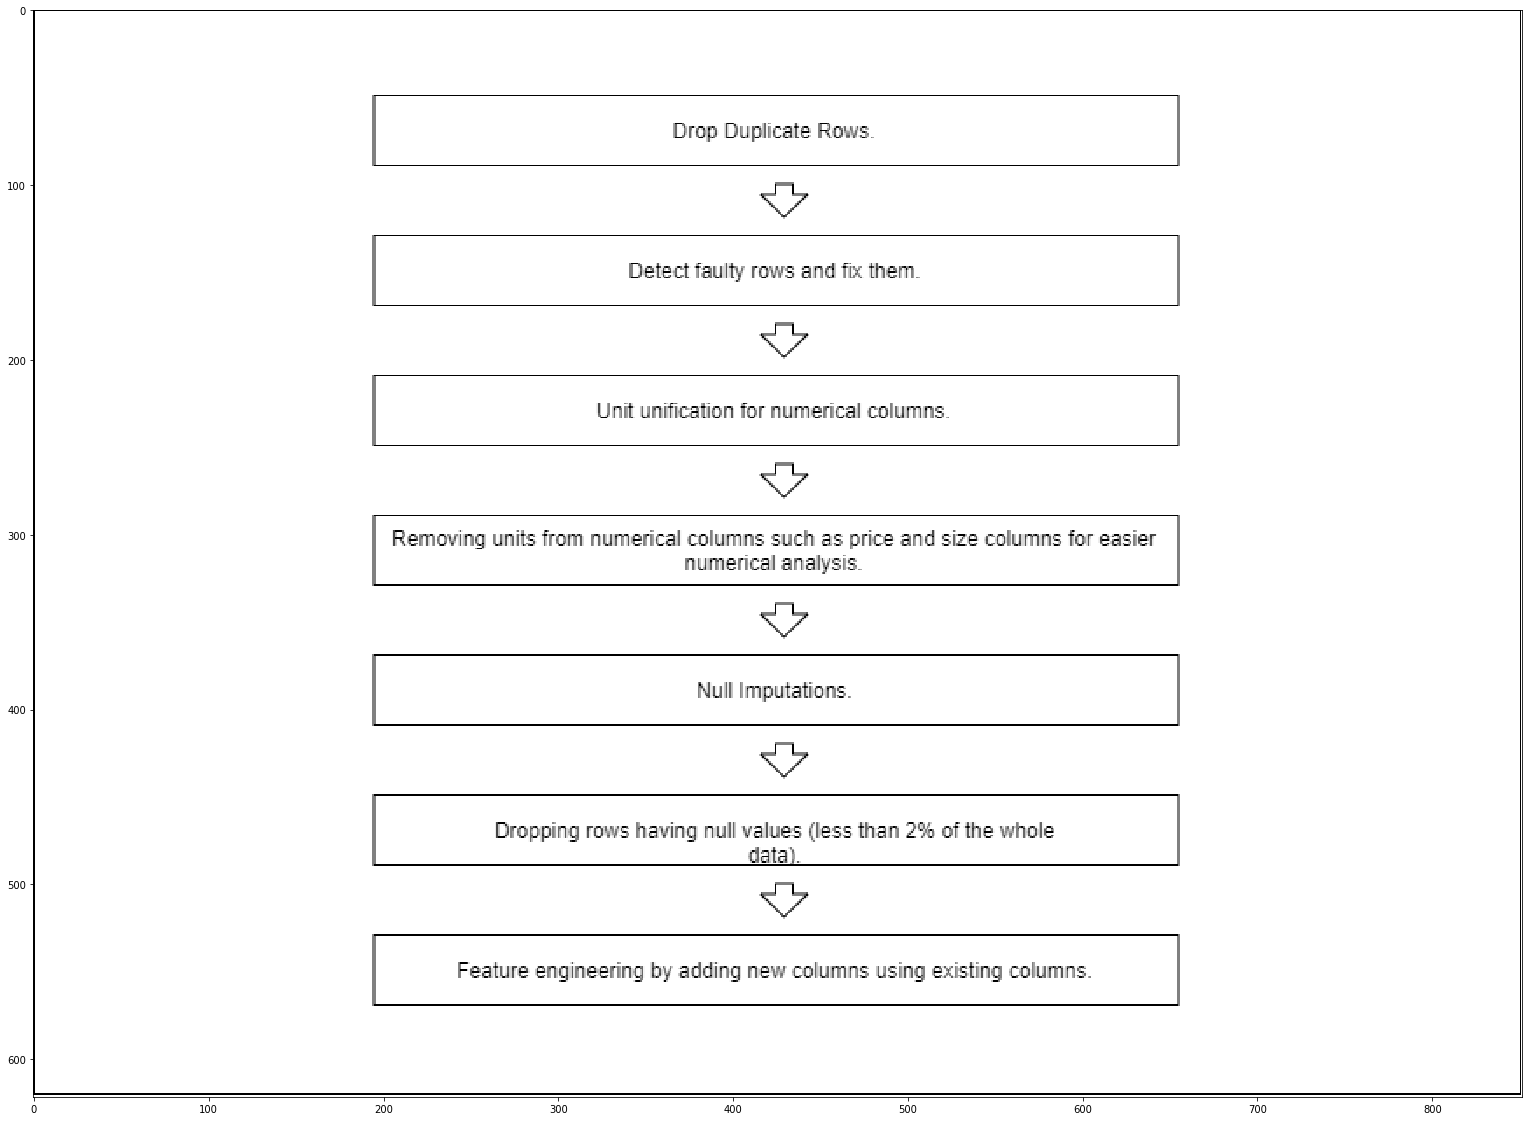

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(180, 20))
img = mpimg.imread('Data/Preprocessing Sequence.png')
plt.imshow(img)

## Collection and Cleaning

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# read google play store apps data
googleDF = pd.read_csv("data/googleplaystore.csv")

googleDF

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [2]:
googleDF["Installs"].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

#### If we decided to drop all the missing values, we will be dropping 1481 rows which is corresponding to dropping 1481 apps. This approach is not suitable because we will be losing valuable data.

In [3]:
googleShape = googleDF.shape
missingData = googleShape[0] - googleDF.dropna().shape[0]
print(googleShape)
print(missingData)

(10841, 13)
1481


#### Counting the number of all missing values for each column

In [4]:
missing_values = googleDF.isnull().sum()
print(missing_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


#### Each row should represent one app and therefore the number of unique apps should be equal to the number of rows.

In [5]:
googleDF.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

#### The number of rows exceeded the number of apps, and therefore there are duplicate values for the apps.
#### We will drop all duplicate rows.

In [6]:
# This is the number of duplicated apps.
print(googleDF.loc[googleDF['App'].duplicated(keep = 'first'), :].shape)

# new dataset with all duplicated apps dropped.
uniqueDF = googleDF.drop_duplicates(subset = ['App'], keep = 'first')

# Now the number rows matches the number of unique apps.
print(uniqueDF.shape)

# We reduced the number of missing values.
print(uniqueDF.isnull().sum())

(1181, 13)
(9660, 13)
App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


#### We're handling the issues in the Category column

In [7]:
# We observed the unique values of category and found one odd value which is 1.9
uniqueDF['Category'].unique()

# We viewed the record with the odd category value and found out that the whole row has incorrect values for 
# their corresponding columns. The values are shifted one row to the left.
uniqueDF[uniqueDF['Category'] == '1.9']

# We got the row index for that specific row
rowNumber = np.where(uniqueDF['Category'] == '1.9')[0][0]

# We corrected the row by shifting it to the right
uniqueDF.iloc[rowNumber, 1:] = uniqueDF.iloc[rowNumber, 1:].shift(1)

# The column values are now correct, but we have a missing category value.
# We checked play store and got the category of that app and manually inserted it.
uniqueDF.iloc[rowNumber, 1] = 'LIFESTYLE'

uniqueDF.iloc[rowNumber]

C:\Users\Engy_\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Engy_\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_insta

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

#### We removed the dollar sign from the price column and the + sign from the Installs column

In [8]:
temp = uniqueDF

# We converted the string to integers.
def extract_num(x):
    return int(''.join(n for n in x if n.isdigit()))

temp['Installs'] = temp['Installs'].map(extract_num)
temp['Price'] = temp['Price'].map(extract_num)

uniqueDF

C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


#### We decided to unify the values in the column Size, in which all the values were in the same units (MB)

In [9]:
# Function that checks if the size is in KB, it then converts it to MB.
def convert_to_mega(K):
    if K[-1] == 'k':
        ret = float(K[:-1])
        return ret / 1024
    elif K[-1] == 'M':
        ret = float(K[:-1])
        return ret
    return K

uniqueDF['Size'] = uniqueDF['Size'].map(convert_to_mega)
uniqueDF

C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


#### We will replace the null value in the Ratings column with the mean of the apps in the same category

In [10]:
# We changed the type of the column to numeric to be able to calculate its mean
uniqueDF['Rating'] = pd.to_numeric(uniqueDF['Rating'])

# We groupedby the category and replace the null values in the Ratings columns with their categories mean
uniqueDF['Rating'] = uniqueDF.groupby("Category").transform(lambda x: x.fillna(x.mean()))

uniqueDF.head()

C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### There are only 12 records with null values, so we decided to drop them

In [11]:
uniqueDF.dropna(inplace = True)

C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Check if there is still any null values

In [12]:
uniqueDF.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### rename the columns to suite the type of its values

In [13]:
uniqueDF.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size (M)', 'Minimum Number of Installs', 'Type',
       'Price ($)', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']

uniqueDF

,App,Category,Rating,Reviews,Size (M),Minimum Number of Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


##### Added a new column representing the count of days passed since last updated day.

In [26]:
# Takes as input a date in text and return a datetime object
def stringToDate(text):
    month = {'January':1,
        'February':2,
        'March':3,
        'April':4,
        'May':5,
        'June':6,
        'July':7,
        'August':8,
        'September':9,
        'October':10,
        'November':11,
        'December':12}
    mon  = month[text.split(',')[0].split(" ")[0]]
    day  = int(text.split(',')[0].split(" ")[1])
    year = int(text.split(',')[1][-4:])
    return datetime.datetime(year, mon, day)


# Takes as input text of the date and return the number of days past since that day
def stringToDays(txt):
    return -1 * (stringToDate(txt) - datetime.datetime.now()).days

# Create a new column to represent an approximate of how frequently the application is maintained.
uniqueDF["Last Updated From"] = uniqueDF["Last Updated"].apply(lambda x: stringToDays(x))

C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb 
import datetime
from sklearn import preprocessing

### Exploring which app type is most commonly added to Android Store (Free vs Paid)

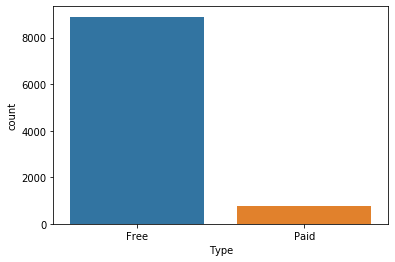

In [15]:
#bar char plotting free count vs paid count
sb.countplot(x='Type',data=uniqueDF)

##### We can tell from the results, that more than 8000 apps are free while less than 2000 are paid apps.

### How many apps are free or paid?

   Type  Apps_Percentage
0  Free        92.195274
1  Paid         7.804726
AxesSubplot(0.125,0.125;0.775x0.755)


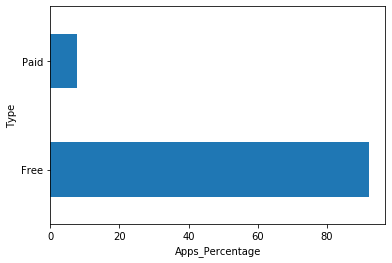

In [16]:
# We wanted to find the percentage of apps that are free and those that are paid
appCountPerType = uniqueDF.groupby('Type',as_index=False)['App'].count()
appCountPerType['App'] = appCountPerType['App']/appCountPerType['App'].sum() * 100
appCountPerType.columns = ['Type' , 'Apps_Percentage']
print(appCountPerType)


# We then plotted a bar chart to compare between both types.
graph = appCountPerType['Apps_Percentage'].plot(kind = 'barh')
plt.xlabel('Apps_Percentage')
plt.ylabel('Type')
plt.yticks(appCountPerType.index,appCountPerType["Type"].values)
print(graph)

##### From previous graph we can see that 92% of apps in Android store are of type Free. We will investigate the reason behind this.

### Now getting to see relation between Ratings and (Category/Type)

               Category  Ratings_Mean
0        ART_AND_DESIGN      4.375748
1     AUTO_AND_VEHICLES      4.190411
2                BEAUTY      4.278571
3   BOOKS_AND_REFERENCE      4.344970
4              BUSINESS      4.098479
5                COMICS      4.181481
6         COMMUNICATION      4.121484
7                DATING      3.970149
8             EDUCATION      4.364407
9         ENTERTAINMENT      4.135294
10               EVENTS      4.435556
11               FAMILY      4.179762
12              FINANCE      4.115563
13       FOOD_AND_DRINK      4.172340
14                 GAME      4.247368
15   HEALTH_AND_FITNESS      4.243033
16       HOUSE_AND_HOME      4.150000
17   LIBRARIES_AND_DEMO      4.179066
18            LIFESTYLE      4.092017
19  MAPS_AND_NAVIGATION      4.036441
20              MEDICAL      4.166552
21   NEWS_AND_MAGAZINES      4.121569
22            PARENTING      4.300000
23      PERSONALIZATION      4.331585
24          PHOTOGRAPHY      4.157414
25         P

Text(0.5, 1, 'Rating VS Category')

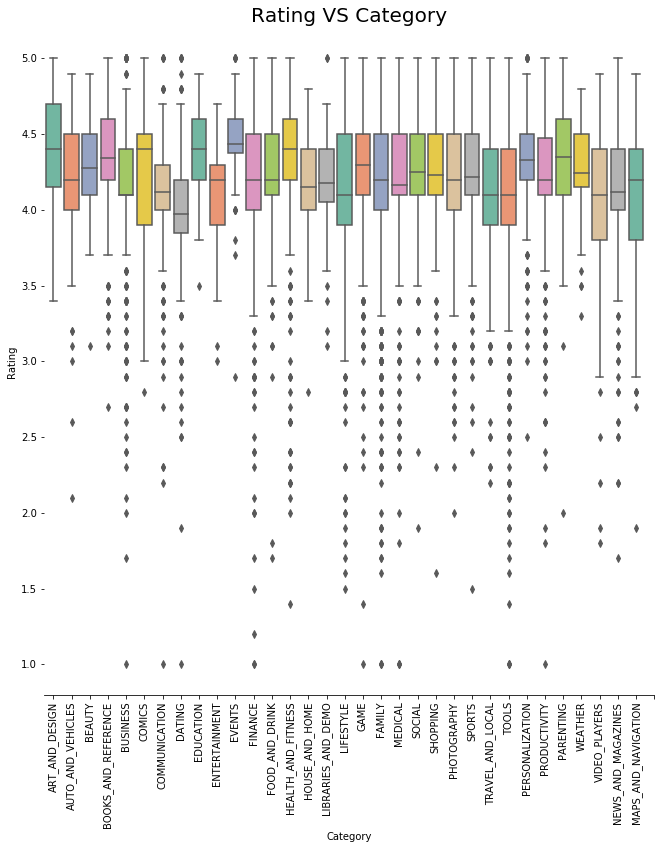

In [17]:
# method which returns a dataframe grouped by the input(col) and rating attribute mean
def get_mean_rating(df, col):
    mean = df.groupby(col,as_index=False)['Rating'].mean()
    return mean

#dataframe of category and ratings mean
MeanRatingsPerCategory = get_mean_rating(uniqueDF, 'Category')
MeanRatingsPerCategory.columns = ['Category' , 'Ratings_Mean']
print(MeanRatingsPerCategory)

#box plot og category vs rating
g = sb.catplot(x="Category",y="Rating",data=uniqueDF, kind="box", height = 10 ,
palette = "Set2")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Rating VS Category',size = 20)

##### From Box Plot , we can see that all categories available in android store are succeeding with similar mean values of ratings. We can also see that Event Apps have the highest ratings mean while Dating Apps have lowest ratings mean.

   Type  Ratings_Mean
0  Free      4.165887
1  Paid      4.247260


Text(0.5, 1, 'Rating VS Type')

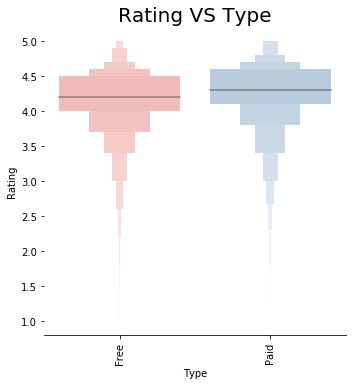

In [18]:
#dataframe of type and ratings mean
MeanRatingsPerType = get_mean_rating(uniqueDF, 'Type')
MeanRatingsPerType.columns = ['Type' , 'Ratings_Mean']
print(MeanRatingsPerType)

#box plot type vs rating
g = sb.catplot(x="Type",y="Rating",data=uniqueDF, kind="boxen", height = 5 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Rating VS Type',size = 20)

##### From Box Plot , we can see that free apps and paid apps have nearly equal ratings values.

### Which category of Apps are most commonly not free to install? 

In [19]:
# method that sets type column to booleans -- free type to 0 and paid type to 1. To see only paid types later
def get_paid_bool(intype):
    if (intype == 'Free'):
        return 0
    return 1

#method that applies get_paid_bool method to the dataframe
def change_paid_to_bool(df):
    ret = df.copy()
    ret['Type'] = ret['Type'].map(get_paid_bool)
    return ret


df_paid = change_paid_to_bool(uniqueDF)


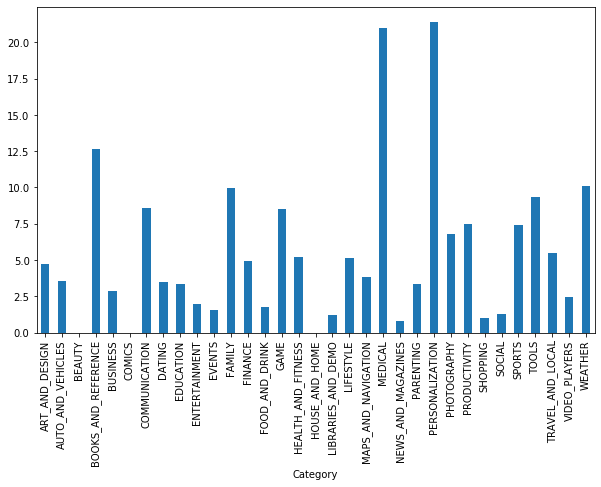

In [20]:
#return paid count percentage per input(col) which is other attribute
def get_paid_sum(df, col):
    ret = (df.groupby(col)['Type'].sum()/ df.groupby(col)['Type'].count())*100
    return ret

#showing percentage of paid apps per categories
CatPerPaid = get_paid_sum(df_paid, 'Category')
# print(CatPerPaid)
CatPerPaid.plot(kind = 'bar' , figsize = (10,6))


##### We can see that the percentage of paid apps is peaking in medical and personalization categories.

C:\Users\Engy_\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


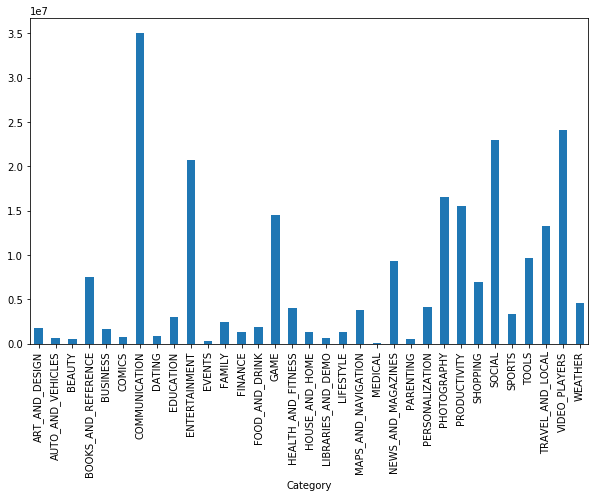

In [21]:
#return paid mean of installs per input(col) which is other attribute
def get_paid_sum_installs(df, col):
    cdf = df.copy()
    cdf = cdf[cdf.Type == 'Paid']
    ret = df.groupby(col)['Minimum Number of Installs'].sum()/ df.groupby(col)['Type'].count()
    return ret

#showing paid apps mean of installs per categories
CatPerPaid = get_paid_sum_installs(df_paid, 'Category')
# print(CatPerPaid)
CatPerPaid.plot(kind = 'bar' , figsize = (10,6))

##### Although, we found out that the highest number of installs in paid apps are in communication, social and video players categories. And surprisingly the number of installs for medical and personalization paid apps are really very low!

### Are paid apps downloaded as much as free apps?

Text(0.5, 1, 'Type VS Installs')

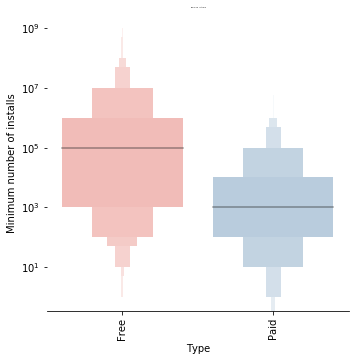

In [22]:
#box plot type vs minimum number of installs
g = sb.catplot(x="Type",y="Minimum Number of Installs",data=uniqueDF, kind="boxen", height = 5 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.yscale('log')
g = g.set_ylabels("Minimum number of installs")
plt.title('Type VS Installs',size = 2)

#### No, paid apps are not downloaded as much as free apps, paid apps have a relatively lower number downloads than the free apps.

### Is there a relationship between the number of reviews and the number of installs?

C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


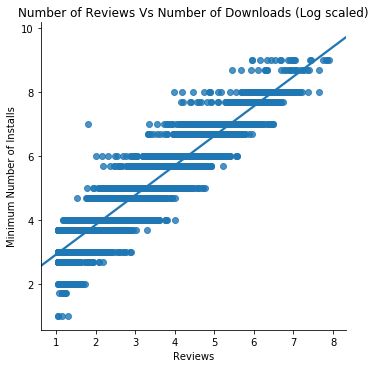

In [23]:
uniqueDF['Reviews'] = pd.to_numeric(uniqueDF['Reviews'])
df_copy = uniqueDF.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy['Minimum Number of Installs'] > 0]

df_copy['Minimum Number of Installs'] = np.log10(uniqueDF['Minimum Number of Installs'])
df_copy['Reviews'] = np.log10(uniqueDF['Reviews'])

# plotting co-relation between reviews count and minimum number of installs
sb.lmplot("Reviews", "Minimum Number of Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

#### There is a positive correlation between the number of reviews and the number of installs. As the number of reviews increasem, the number of minimum installs increases.Thus, this correlation shows that users tend to install apps that are reviewed by a large number of people. 
#### Moreover, this can also mean that a considerable amount of users give feedbacks or reviews after installing an app.


### Is there a relationship between ratings values and the app size?

C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


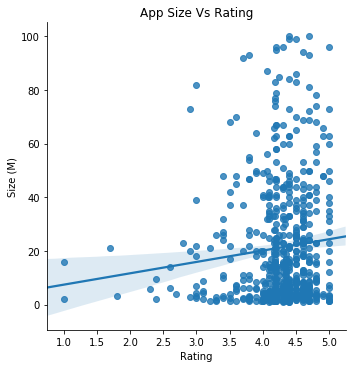

In [24]:
df = uniqueDF
df['Size (M)'] = df['Size (M)'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)

df['Size (M)'] = pd.to_numeric(df['Size (M)'])

df = df[df.Type == 'Paid']
df = df[df['Size (M)'] > 1]

#co-relation between ratings and app size
sb.lmplot( "Rating","Size (M)", data=df)
ax = plt.gca()
_ = ax.set_title('App Size Vs Rating')


#### The scatter plot shows a condensation between the high ratings (3.5 - 5.0)  and the small app sizes (between roughly 5M till 18M), for paid apps. Concluding that, most of the paid apps in the Android Store with high ratings, are of small sizes. This could refer that for a more successful paid app, it is advisable to consider the size to be relatively small.

### Who are the targeted users across categories?
##### Distribution of content rating within each category.

C:\Users\Engy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Engy_\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0, 0.5, 'Count')

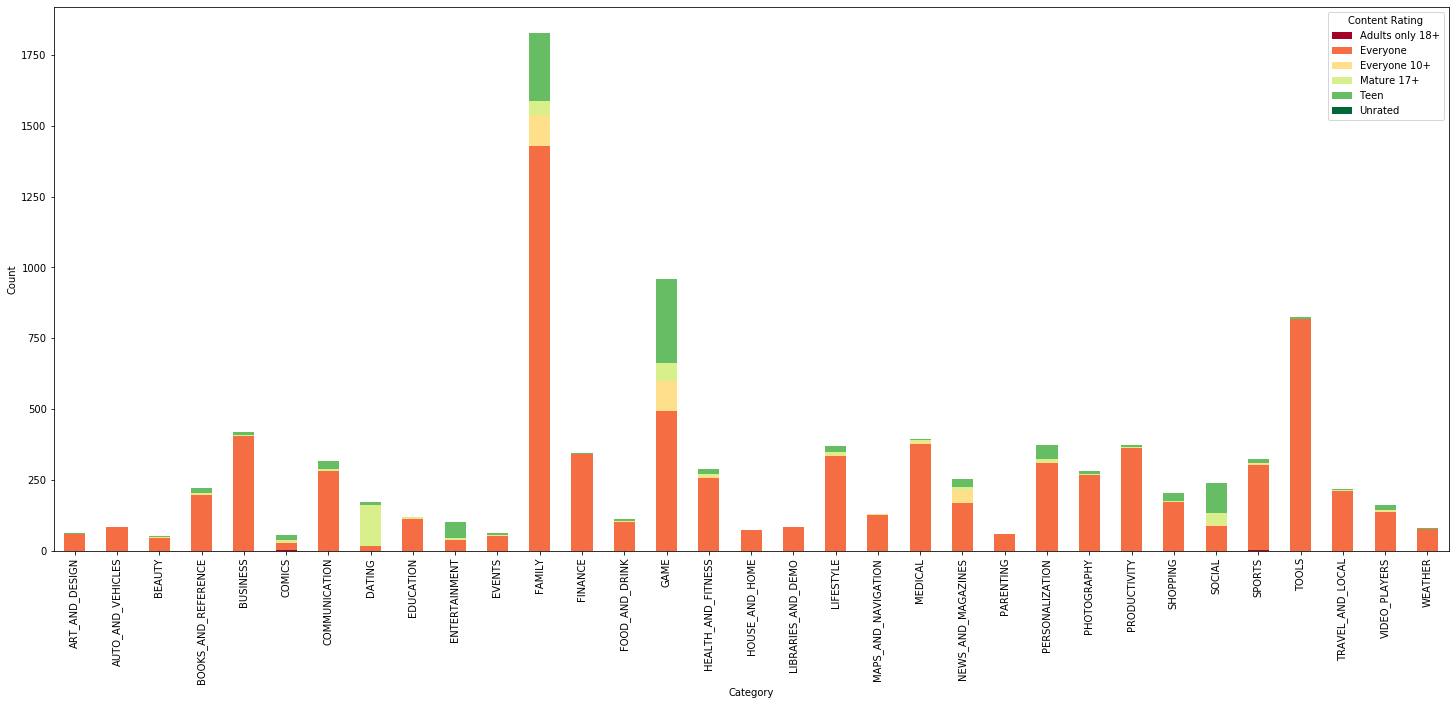

In [25]:
uniqueDF['Counter'] = 1

#grouping by category and content rating to get count of each type of content rating per category.
group = uniqueDF.groupby(['Category', 'Content Rating'], as_index = False)['Counter'].sum()
categories = group['Category'].unique()
categoriesSize = categories.size
contentRating = group['Content Rating'].unique()
crSize = contentRating.size
count = group['Counter']

colors = cm.RdYlGn(np.linspace(0,1,6))
group.pivot(index='Category', columns='Content Rating', values='Counter').plot(kind='bar' , figsize=(25,10), stacked = True , colors = colors)
plt.ylabel('Count')

##### From this multiple bar chart, we can see who are the application targeted audience according to each category.

### Is there a relation between last update of the application and number of installs?
Assuming that the last update date will indicate if the application is maintained.

This graph represents the effect of making frequent maintenance for the application on the number of installs


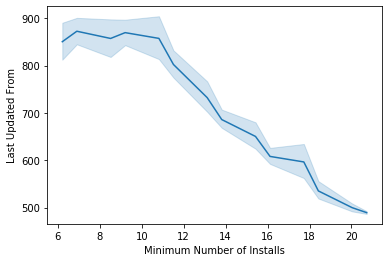

In [27]:
tempdf = uniqueDF.copy()
# remove the applications that have very few installs to filter out the newly created applications.
tempdf['Minimum Number of Installs'] = tempdf['Minimum Number of Installs'][tempdf['Minimum Number of Installs']>100]

# normalize the number of installs to view it in graph easly
tempdf['Minimum Number of Installs'] = np.log(tempdf['Minimum Number of Installs'])

print("This graph represents the effect of making frequent maintenance for the application on the number of installs")
ax = sb.lineplot(x="Minimum Number of Installs", y="Last Updated From", data=tempdf)

##### This graph shows that there is a positive relation between frequency of updating applications and number of installs.